# Kernel and Locally-Weighted Regression

This is an implementation of Kernel Regression and Locally-Weighted Regression from scratch.

In [190]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.linspace(-15, 15, 200)
y = 5 + -500*x - x**2/5 + 3*x**3 + np.random.randn(len(x))*200

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=11)

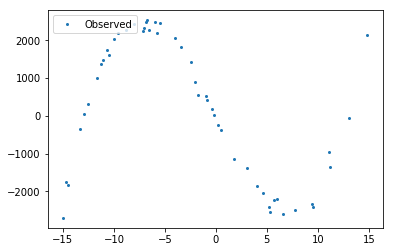

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(xtest.tolist(), ytest.tolist(), marker='o', linestyle='', ms=2, label='Observed')
ax.legend(numpoints=1, loc='upper left')
plt.show()

### Nadaraya-Watson Kernel Estimator

I will use the [Nadaraya-Watson Kernel estimator with a Gaussian Kernel](http://www.maths.manchester.ac.uk/~peterf/MATH38011/NPR%20N-W%20Estimator.pdf):

$\hat f_n(X) = \sum_{i=1}^n w_i Y_i$

where

$w_i(X_0) = \frac{K\left(\frac{X_0-X_i}{h}\right)}{\sum_{i=0}^n K\left(\frac{X_0-X_i}{h}\right)}$

In [192]:
# Kernel
def gaussianKernel(x, x0, h):
    return np.exp(-np.power((x-x0) / h, 2) / 2)

# weight estimator
def weightFunction(x, x0, h):
    kernels = np.array([gaussianKernel(x, xi, h) for xi in x0])
    sum_kernels = np.sum(kernels, axis=1).reshape((-1,1))
    w = kernels/sum_kernels
    return w

In [ ]:
# def Nadaraya-Watson Kernel Estimator
def NWKE(x, x0, y0, h):
    w = weightFunction(x, x0, h)
    y = w.T @ y0
    return y

MAE with h=1 is: 2766.6054208222677


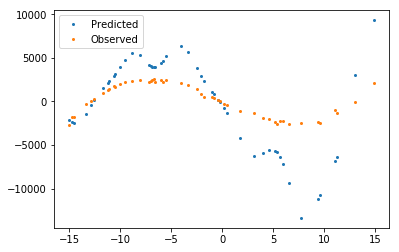

In [204]:
h = 1
pred = NWKE(xtest, xtrain, ytrain, h)
print('MAE with h={} is: {}'.format(h, np.mean([abs(p-y) for p, y in zip(pred, ytest)])))

fig, ax = plt.subplots()
ax.plot(xtest.tolist(), pred, marker='o', linestyle='', ms=2, label='Predicted')
ax.plot(xtest.tolist(), ytest.tolist(), marker='o', linestyle='', ms=2, label='Observed')
ax.legend(numpoints=1, loc='upper left')
plt.show()

MAE with h=8 is: 1080.5313535083415


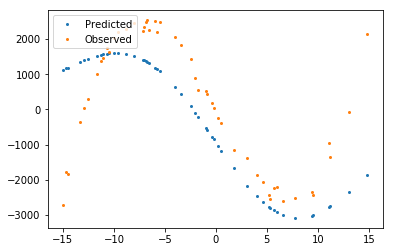

In [205]:
h = 8
pred = NWKE(xtest, xtrain, ytrain, h)
print('MAE with h={} is: {}'.format(h, np.mean([abs(p-y) for p, y in zip(pred, ytest)])))

fig, ax = plt.subplots()
ax.plot(xtest.tolist(), pred, marker='o', linestyle='', ms=2, label='Predicted')
ax.plot(xtest.tolist(), ytest.tolist(), marker='o', linestyle='', ms=2, label='Observed')
ax.legend(numpoints=1, loc='upper left')
plt.show()

### Locally-Weighted Regression

For every point $X_i$, perform a least squares regression and weight those regression outputs using the Nadaraya-Watson Kernel weights. The equation for every regression is:

$\hat\beta = (X^T W X)^{−1}X^T W y$

where $W$ is a diagonal matrix of weights.

In [195]:
def LWR(x, x0, y0, h):
    weight = weightFunction(x, x0, h)
    x = np.column_stack([np.ones(len(x)), x])
    x0 = np.column_stack([np.ones(len(x0)), x0])
    y0 = y0[:, np.newaxis]
    y = []
    for w, x in zip(weight.T, x):
        w = np.diag(w)
        beta = np.linalg.inv(x0.T @ w @ x0) @ x0.T @ w @ y0
        y.append(x @ beta)
    return np.array(y)

MAE with h=10 is: 1267.313427207156


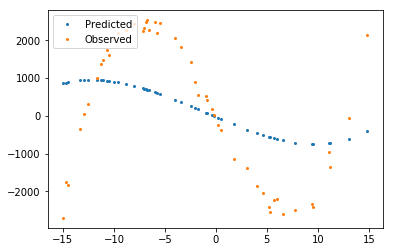

In [210]:
h = 10
pred = LWR(xtest, xtrain, ytrain, h)
print('MAE with h={} is: {}'.format(h, np.mean([abs(p-y) for p, y in zip(pred, ytest)])))

fig, ax = plt.subplots()
ax.plot(xtest.tolist(), pred, marker='o', linestyle='', ms=2, label='Predicted')
ax.plot(xtest.tolist(), ytest.tolist(), marker='o', linestyle='', ms=2, label='Observed')
ax.legend(numpoints=1, loc='upper left')
plt.show()

MAE with h=0.1 is: 234.12780454317235


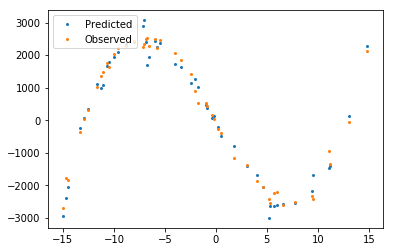

In [211]:
h = .1
pred = LWR(xtest, xtrain, ytrain, h)
print('MAE with h={} is: {}'.format(h, np.mean([abs(p-y) for p, y in zip(pred, ytest)])))

fig, ax = plt.subplots()
ax.plot(xtest.tolist(), pred, marker='o', linestyle='', ms=2, label='Predicted')
ax.plot(xtest.tolist(), ytest.tolist(), marker='o', linestyle='', ms=2, label='Observed')
ax.legend(numpoints=1, loc='upper left')
plt.show()